In [1]:
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
iso_base_w = 64
iso_base_h = 32

In [25]:
im_v = Image.open('tile-experiments/landh_ref.png')
rgb_im_v = im.convert('RGB')

cols_im_v = set()
grey_im_v = set()
for sy in range(rgb_im.size[1]):
	for sx in range(rgb_im.size[0]):
		c = r, g, b = rgb_im.getpixel((sx, sy))
		cols_im_v.add(c)
		grey_im_v.add((r + g + b) // 3)
print(cols_im_v)
print(sorted(grey_im_v))

{(227, 227, 227), (57, 57, 57), (142, 142, 142), (28, 28, 28), (113, 113, 113), (198, 198, 198), (0, 0, 0), (170, 170, 170), (255, 255, 255), (85, 85, 85)}
[0, 28, 57, 85, 113, 142, 170, 198, 227, 255]


(32, 3328)
104.0


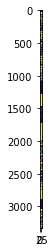

In [35]:
im = Image.open('tile-experiments/landh_ref.png')
rgb_im = im.convert('RGB')

print(rgb_im.size)
print(rgb_im.height / rgb_im.width)

plt.imshow(im)
plt.show()

In [23]:
def convert_coords(x, y, w, h, voff):
	x = max(0, min(iso_base_w - 1, x))
	y = max(0, min(iso_base_h - 1, y))
	u = (2 * x - iso_base_w) / iso_base_w
	v = (2 * y - iso_base_h) / iso_base_h
	r = max(-1, min(1, u - v))
	s = max(-1, min(1, u + v))
	sx = max(0, min(w - 1, (r + 1) * w / 2))
	sy = max(0, min(h - 1, (s + 1) * h / 2)) + voff
	rv, gv, bv = rgb_im_v.getpixel((sx, sy))
	v = int(iso_base_h * (rv + gv + bv) / (3 * 255) / 2)
	return sx, sy, v

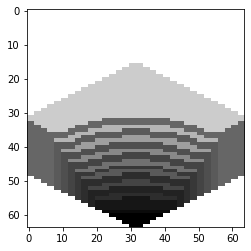

In [46]:
img = Image.new( 'RGBA', (iso_base_w, iso_base_h * 2), (0, 0, 0, 0))
pixels = img.load()
vpos = 11

for y in range(img.size[1]):
	for x in range(img.size[0]):
		if abs((iso_base_w - 1) / 2 - x) < (iso_base_h + 1) - abs(iso_base_h - 1 -2*y):
			sx, sy, v = convert_coords(x, y, rgb_im.width, rgb_im.width, voff=rgb_im.width * vpos)
			r, g, b = rgb_im.getpixel((sx, sy))
			r, g, b = int(r * .8), int(g * .8), int(b * .8)

			for i in range(0, v):
				pixels[x, iso_base_h + y - i] = (int(r/2), int(g/2), int(b/2), 255)

			pixels[x, iso_base_h + y - v] = (r, g, b, 255)

plt.imshow(img)
plt.show()